# Let's import a bunch of stuff

In [2]:
import sys
import seaborn as sb
import scanpy.api as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import argparse
import gc
import os

%matplotlib inline

In [3]:
name = "CLUESImmVarMonoDC"
processed_path = os.readlink(name+'.V4.h5ad');
# processed_path = os.path.normpath(processed_path)
print(processed_path)

adata = sc.read(processed_path, cache=False)
adata.shape

../../../../../../../Downloads/CLUESImmVarMonoDC.V4.h5ad


(235889, 2013)

# Let's first cluster with slightly lower resolution

In [4]:
# adata.X = adata.uns["raw_counts"][:,adata.raw.var_names.isin(adata.var_names)]
# ##adata = sc.pp.log1p(adata)
# adata.obs["PF4_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PF4"].toarray()
# adata.obs["GNG11_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "GNG11"].toarray()
# adata.obs["PPBP_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PPBP"].toarray()
# adata.obs["SDPR_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "SDPR"].toarray()

# adata.obs["PF4"] = adata.raw[:,"PF4"].X
# adata.obs["GNG11"] = adata.raw[:,"GNG11"].X
# adata.obs["PPBP"] = adata.raw[:,"PPBP"].X
# adata.obs["SDPR"] = adata.raw[:,"SDPR"].X

# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito', 'Female', 'Broad', 'PF4_raw', 'PPBP_raw', 'SDPR_raw', 'GNG11_raw'])
# sc.pp.scale(adata, max_value=10)
# sc.pp.pca(adata, random_state=1)
# sc.pp.neighbors(adata, random_state=1, n_neighbors=15)
# sc.tl.umap(adata, min_dist=2, gamma=10, random_state=1)
# sc.pl.umap(adata, color='louvain')
# sc.pl.umap(adata, color=['PF4'])

In [5]:
# adata.X = adata.uns["raw_counts"][:,adata.raw.var_names.isin(adata.var_names)]
# ##adata = sc.pp.log1p(adata)
# adata.obs["PF4_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PF4"].toarray()
# adata.obs["GNG11_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "GNG11"].toarray()
# adata.obs["PPBP_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PPBP"].toarray()
# adata.obs["SDPR_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "SDPR"].toarray()

# adata.obs["PF4"] = adata.raw[:,"PF4"].X
# adata.obs["GNG11"] = adata.raw[:,"GNG11"].X
# adata.obs["PPBP"] = adata.raw[:,"PPBP"].X
# adata.obs["SDPR"] = adata.raw[:,"SDPR"].X

# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito', 'Female', 'Broad', 'PF4', 'PPBP', 'SDPR', 'GNG11'])
# sc.pp.scale(adata, max_value=10)
# sc.pp.pca(adata, random_state=1)
# sc.pp.neighbors(adata, random_state=1, n_neighbors=15)
# sc.tl.umap(adata, min_dist=2, gamma=10, random_state=1)
# sc.pl.umap(adata, color='louvain')
# sc.pl.umap(adata, color=['PF4'])

In [6]:
# adata.X = adata.uns["raw_counts"][:,adata.raw.var_names.isin(adata.var_names)]
# ##adata = sc.pp.log1p(adata)
# adata.obs["PF4_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PF4"].toarray()
# adata.obs["GNG11_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "GNG11"].toarray()
# adata.obs["PPBP_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "PPBP"].toarray()
# adata.obs["SDPR_raw"] = adata.uns["raw_counts"][:,adata.raw.var_names == "SDPR"].toarray()

# adata.obs["PF4"] = adata.raw[:,"PF4"].X
# adata.obs["GNG11"] = adata.raw[:,"GNG11"].X
# adata.obs["PPBP"] = adata.raw[:,"PPBP"].X
# adata.obs["SDPR"] = adata.raw[:,"SDPR"].X

# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito', 'PF4', 'PPBP', 'SDPR', 'GNG11'])
# sc.pp.scale(adata, max_value=10)
# sc.pp.pca(adata, random_state=1)
# sc.pp.neighbors(adata, random_state=1, n_neighbors=15)
# sc.tl.umap(adata, min_dist=2, gamma=10, random_state=1)
# sc.pl.umap(adata, color='louvain')
# sc.pl.umap(adata, color=['PF4'])

In [7]:
adata = adata[:,adata.X.sum(axis=0) > 0]

In [8]:
sc.pp.regress_out(adata, ['batch_cov'])

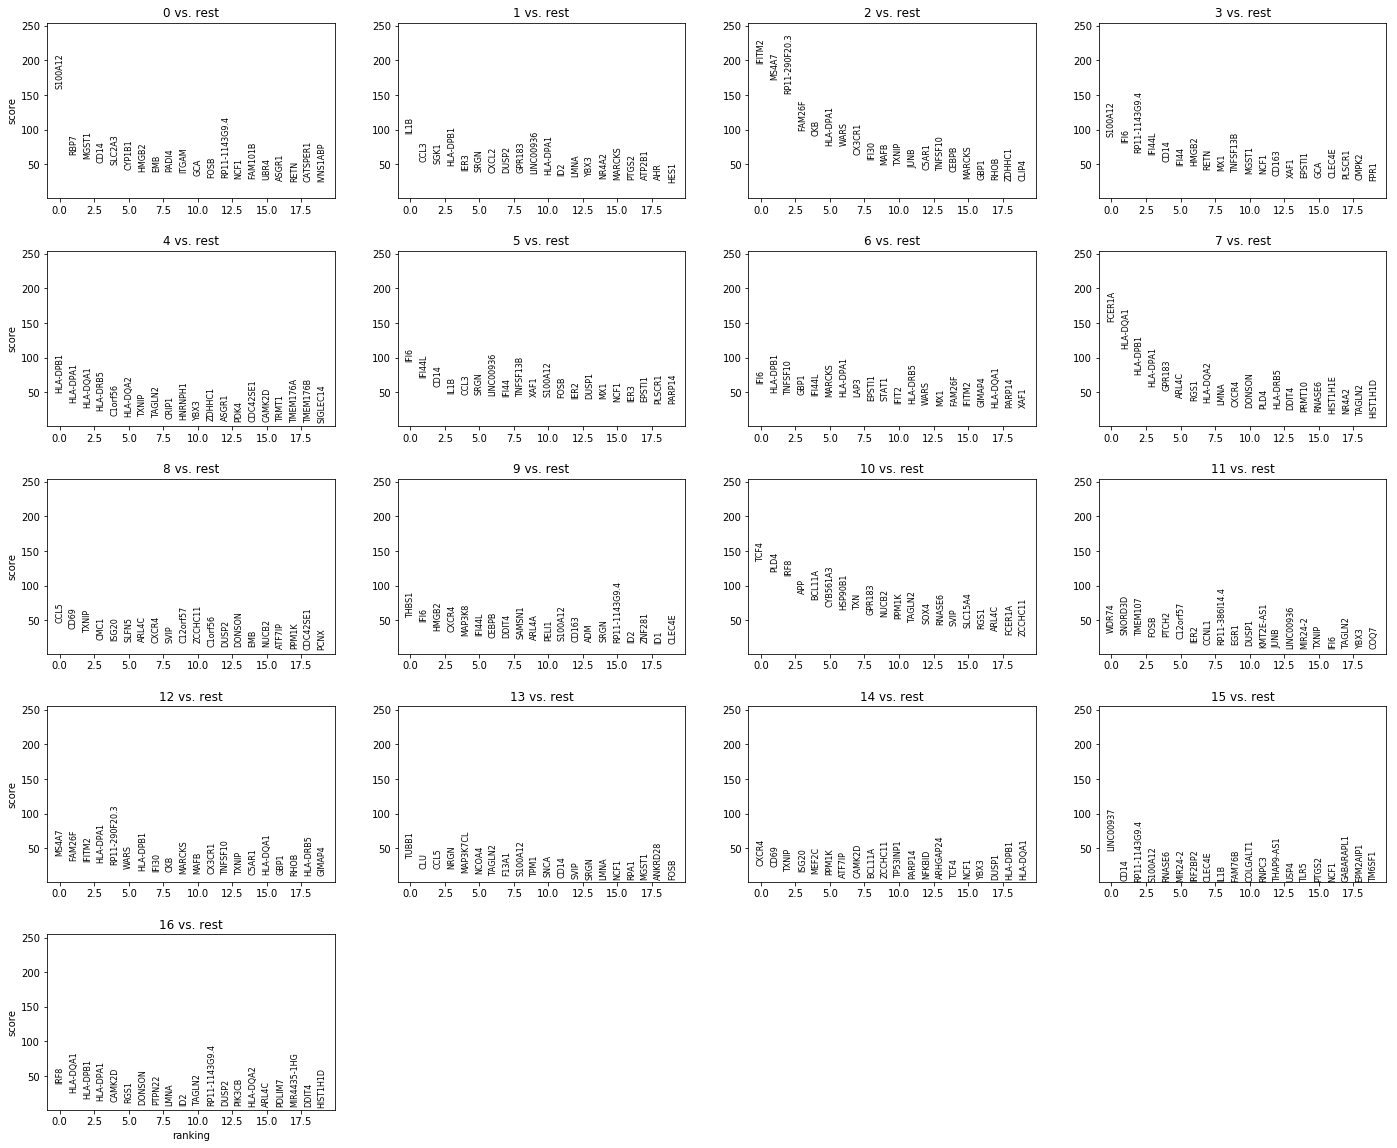

In [9]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=25, n_neighbors=20)
#get visualization of all markers and their scores
sc.tl.louvain(adata)

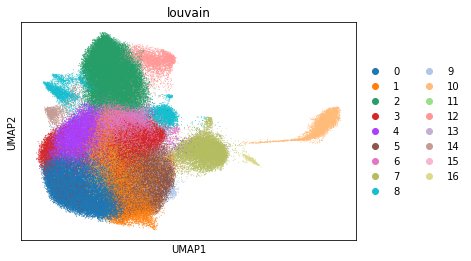

In [10]:
#plot UMAP of cell types colored by clusters
adata.uns['louvain_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.tl.umap(adata)
sc.pl.umap(adata, color='louvain', size=3)

## Also plot some differentially expressed genes

## And of course UMAP with the louvain clusters highlighted

In [ ]:
#plot UMAP of cell types colored by clusters
adata.uns['louvain_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.pl.umap(adata, color='louvain', size=3)

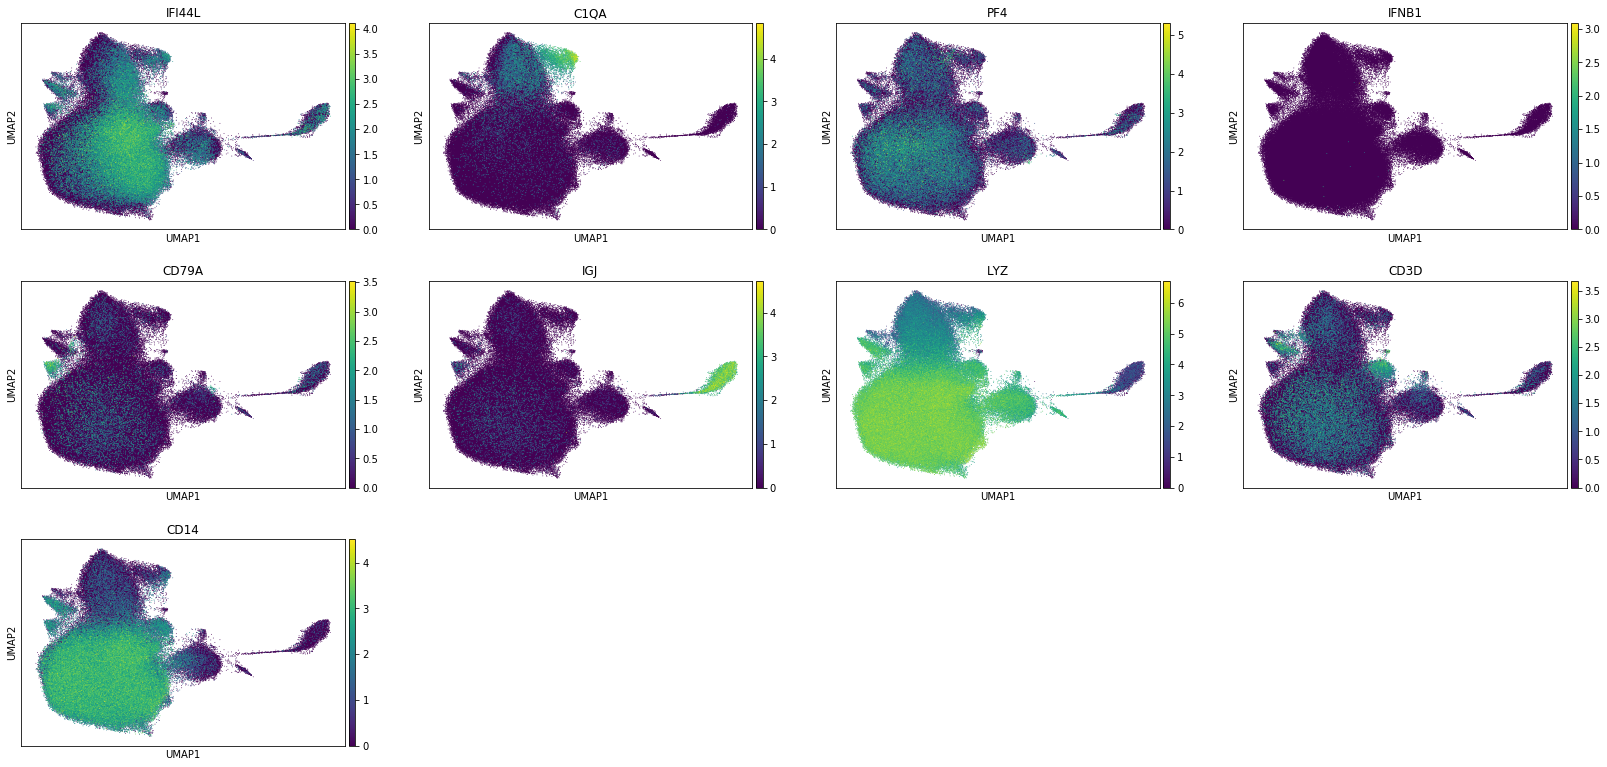

In [11]:
sc.pl.umap(adata, color=['IFI44L','C1QA','PF4','IFNB1','CD79A','IGJ','LYZ','CD3D','CD14'], size=3)

# Now let's plot differences in cluster proportion

In [ ]:
#get counts of cells for each cluster
ct_counts=adata.obs.groupby(['ind_cov', 'disease_cov','louvain'])['louvain'].count()
ct_percs = ct_counts/ct_counts.groupby(level=[0]).transform(sum)*100
ct_percs = ct_percs.reset_index(name='ct_percs')
ct_percs.ind_cov = ct_percs.ind_cov.apply(lambda x: x.split('_')[0])
ct_percs.ind_cov = ct_percs.ind_cov.astype("str")
ct_percs.reset_index(inplace=True)
ct_percs.louvain = ct_percs.louvain.astype("category")
ct_df=ct_percs.unstack(level=2, fill_value=0)

##n_cts=ct_df.shape[1]-1
print('as a proportion of cell type')
for ct_i in list(range(0,16)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    ct_perc = ct_percs.ct_percs[ct_percs.louvain==ct]
    disease = ct_percs.disease_cov[ct_percs.louvain==ct]
    disease = disease.astype("str")
    disease.values[disease=="sle"] = 0
    disease.values[disease=="healthy"] = 1
    disease = sm.add_constant(disease)
    ##data = data.assign(ct_perc=ct_perc)
    print('Cluster type:'+ ct)
    est=sm.OLS(ct_perc.astype(float), disease.astype(float))
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Beta='+str(effect)+', pvalue='+str(pval))

# #box plot as a proportion of cell type
# vars=[str(x) for x in list(range(n_cts))]
# ct_df['ind_cov']=ct_df.index.get_level_values('ind_cov').tolist()
# ct_df.index=ct_df['ind_cov']
# melted=pd.melt(ct_df, id_vars=['ind_cov', 'disease'], value_vars=vars)

#plot=sb.boxplot(x='disease', y='value', hue=ct_arg, data=melted).get_figure()
plt.figure(figsize=(15,8))
plot=sb.catplot(x='disease_cov', y='ct_percs', hue='louvain', data=ct_percs, kind='violin', col='louvain', dodge=False, aspect=0.4, sharex=False, sharey=False, palette=sc.pl.palettes.vega_20_scanpy)
#plt.subplots_adjust(wspace=0.03)

# Let's also plot the absolutely abundance of each cluster

In [ ]:
## Let's grab the clinical and labs data and compare to our single cell estimates
clues_clinical = pd.read_table("v2.clinical.data.txt", index_col=False)
clues_clinical.genotypeid = clues_clinical.genotypeid.apply(lambda x: x.split('_')[0])
clues_clinical.subjectid = clues_clinical.subjectid.astype("str")
joined = ct_percs.join(clues_clinical.set_index('genotypeid'), on='ind_cov')

t1_labs = pd.read_table("T1labs.csv",sep=",")
t1_labs.SubjectID = t1_labs.SubjectID.astype("str")
joined = joined.join(t1_labs.set_index('SubjectID'), on='subjectid')

### test new code
joined.AbsBaso = joined.AbsBaso/1000
joined.AbsEosino = joined.AbsEosino/1000
joined.AbsLympho = joined.AbsLympho/1000
joined.AbsNeutro = joined.AbsNeutro/1000
joined.AbsMono = joined.AbsMono/1000

joined = joined.assign(pbmc = joined.WhiteBloodCell-joined.AbsNeutro-joined.AbsEosino-joined.AbsBaso)

joined[["subjectid",'WhiteBloodCell','AbsMono','AbsLympho','AbsNeutro','AbsEosino','AbsBaso','PlatCount']] = joined[["subjectid",'WhiteBloodCell','AbsMono','AbsLympho','AbsNeutro','AbsEosino','AbsBaso','PlatCount']].astype(str)

## now let's add in white blood cell counts for the immvar patients
immvar_pbmc = pd.read_table("immvar.pbmc.csv", index_col=False, sep=",")
immvar_pbmc.pbmc = immvar_pbmc.pbmc - (np.mean(immvar_pbmc.pbmc) - np.mean(joined.pbmc))

## this is not the most efficient code but will suffice for now
for i in list(range(12)) :
    igtb = immvar_pbmc.immvarid[i]
    joined.pbmc[joined.ind_cov==igtb] = immvar_pbmc.pbmc[i]

joined = joined.assign(estimate=joined.ct_percs/100*joined.pbmc)

joined[["ind_cov","disease_cov","louvain"]] = joined[["ind_cov","disease_cov","louvain"]].astype(str)
joined.plaquenilnow = joined.plaquenilnow.fillna(0)
joined.cellceptnow = joined.cellceptnow.fillna(0)
joined.steroralnow = joined.steroralnow.fillna(0)
joined.acrlymphopenia = joined.acrlymphopenia.fillna(0)

joined_pivot = joined.pivot_table(index=['ind_cov',"disease_cov","pbmc","plaquenilnow","cellceptnow","steroralnow","acrlymphopenia"], columns="louvain", values="estimate")
joined_pivot.reset_index(inplace=True)
joined_pivot = joined_pivot[joined_pivot.pbmc > 0]
joined_pivot.disease_cov = pd.Categorical(joined_pivot.disease_cov,categories=['healthy','sle'], ordered=True)


In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=8, figsize=(20,5))
fig.tight_layout()

for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    sb.boxplot(x="disease_cov", y=ct, data=joined_pivot, color=sc.pl.palettes.vega_20_scanpy[ct_i], ax=ax[ct_i])
    sb.swarmplot(x="disease_cov", y=ct, data=joined_pivot, color="0", size=3, ax=ax[ct_i])

# Let's look at the IFN score now

In [ ]:
ifn = pd.read_table("v2.ifn.sig.txt", sep=" ", index_col=False)
ifn.name = ifn.name.apply(lambda x: x.split('_')[0])
joined2 = ifn.join(joined.set_index("ind_cov"), on="name")
joined_pivot2 = joined2.pivot_table(index=['name',"disease_cov","pbmc","ifn","plaquenilnow","cellceptnow","steroralnow","acrlymphopenia"], columns="louvain", values="estimate")
joined_pivot2.reset_index(inplace=True)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=8, figsize=(20,5))
fig.tight_layout()

##n_cts=ct_df.shape[1]-1
print('as a proportion of cell type')
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    ct_perc = joined_pivot2[ct]
    ifn = joined_pivot2.ifn
    ifn = sm.add_constant(ifn)
    print('Cluster type:'+ ct)
    est=sm.OLS(ct_perc.astype(float), ifn.astype(float),missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Beta='+str(effect)+', pvalue='+str(pval))
    
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    sb.scatterplot(x="ifn", y=ct, data=joined_pivot2, color=sc.pl.palettes.vega_20_scanpy[ct_i], ax=ax[ct_i])
    ##sb.swarmplot(x="disease_cov", y=ct, data=joined_pivot, color="0", size=3, ax=ax[ct_i])

## let's only look at disease

In [ ]:
joined_pivot2_sle = joined_pivot2[joined_pivot2.disease_cov == "sle"]

fig,ax = plt.subplots(nrows=1,ncols=8, figsize=(20,5))
fig.tight_layout()

##n_cts=ct_df.shape[1]-1
print('as a proportion of cell type')
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    ct_perc = joined_pivot2_sle[ct]
    ifn = joined_pivot2_sle.ifn
    ifn = sm.add_constant(ifn)
    print('Cluster type:'+ ct)
    est=sm.OLS(ct_perc.astype(float), ifn.astype(float),missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Beta='+str(effect)+', pvalue='+str(pval))
    
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    sb.scatterplot(x="ifn", y=ct, data=joined_pivot2_sle, color=sc.pl.palettes.vega_20_scanpy[ct_i], ax=ax[ct_i])
    ##sb.swarmplot(x="disease_cov", y=ct, data=joined_pivot, color="0", size=3, ax=ax[ct_i])

## let's only look at healthy

In [ ]:
joined_pivot2_healthy = joined_pivot2[joined_pivot2.disease_cov == "healthy"]

fig,ax = plt.subplots(nrows=1,ncols=8, figsize=(20,5))
fig.tight_layout()

##n_cts=ct_df.shape[1]-1
print('as a proportion of cell type')
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    ct_perc = joined_pivot2_healthy[ct]
    ifn = joined_pivot2_healthy.ifn
    ifn = sm.add_constant(ifn)
    print('Cluster type:'+ ct)
    est=sm.OLS(ct_perc.astype(float), ifn.astype(float),missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Beta='+str(effect)+', pvalue='+str(pval))
    
for ct_i in list(range(0,8)):
    ct = ct_percs.louvain.cat.categories[ct_i]
    sb.scatterplot(x="ifn", y=ct, data=joined_pivot2_healthy, color=sc.pl.palettes.vega_20_scanpy[ct_i], ax=ax[ct_i])
    ##sb.swarmplot(x="disease_cov", y=ct, data=joined_pivot, color="0", size=3, ax=ax[ct_i])

# 6. Let's recompute the IFN score

In [ ]:
diffexp_annot = pd.read_table("ifn.analysis/diffexp.annotations.txt", sep="\t", index_col=False)
diffexp_annot.cluster = diffexp_annot.cluster.astype("category")

In [ ]:
for cluster_i in diffexp_annot.cluster.cat.categories:
    print(cluster_i)
    cluster_X = adata.X[:,adata.var_names.isin(diffexp_annot.gene[diffexp_annot.cluster==cluster_i])];
    adata.obs[cluster_i] = np.sum(cluster_X, axis=1)
    

In [ ]:
##fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5),sharex=True, sharey=True)
##fig.tight_layout()

sc.pl.umap(adata[adata.obs.disease_cov=="sle"], color=['all_ifn',"myeloid_ifn","cm_ifn"], palette="Greys", size=1) ##, vmin=min(adata.obs.all_ifn), vmax=max(adata.obs.all_ifn)*.75)
sc.pl.umap(adata[adata.obs.disease_cov=="healthy"], color=['all_ifn',"myeloid_ifn","cm_ifn"], palette="Greys", size=1) ##,vmin=min(adata.obs.all_ifn), vmax=max(adata.obs.all_ifn)*.75)



##sc.pl.umap(adata[adata.obs.disease_cov=="healthy",], color = "all_ifn", ax=ax[1])                                                      

In [ ]:

sc.pl.umap(adata[adata.obs.disease_cov=="sle"], color=['CD14',"FCGR3A","G0S2"], palette="Greys", size=1) ##, vmin=min(adata.obs.all_ifn), vmax=max(adata.obs.all_ifn)*.75)
sc.pl.umap(adata[adata.obs.disease_cov=="healthy"], color=['CD14',"FCGR3A","G0S2"], palette="Greys", size=1) ##,vmin=min(adata.obs.all_ifn), vmax=max(adata.obs.all_ifn)*.75)



In [ ]:
plot_df = adata.obs.groupby(['ind_cov','disease_cov','louvain'])['all_ifn'].mean()
plot_df = plot_df.reset_index(name='all_ifn_sum')

sb.catplot(x="disease_cov", y="all_ifn_sum", hue='louvain', data=plot_df, kind='violin', col='louvain', dodge=False, aspect=0.4, sharex=False, sharey=True)

##n_cts=ct_df.shape[1]-1
for cluster_i in list(range(0,8)):
    cluster = plot_df.louvain.cat.categories[cluster_i]
    all_ifn_sum = plot_df.all_ifn_sum[plot_df.louvain == cluster]
    disease = plot_df.disease_cov[plot_df.louvain==cluster].astype("str")
    disease.values[disease=="sle"] = 0
    disease.values[disease=="healthy"] = 1
    disease = sm.add_constant(disease)
    est=sm.OLS(all_ifn_sum.astype(float), disease.astype(float), missing='drop')
    ##est=sm.OLS("all_ifn~disease_cov", data=adata.obs.input,missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Cluster='+str(cluster)+',Beta='+str(effect)+', pvalue='+str(pval))

In [ ]:
plot_df = adata.obs.groupby(['ind_cov','disease_cov','louvain'])['cm_ifn'].mean()
plot_df = plot_df.reset_index(name='cm_ifn_sum')

sb.catplot(x="disease_cov", y="cm_ifn_sum", hue='louvain', data=plot_df, kind='violin', col='louvain', dodge=False, aspect=0.4, sharex=False, sharey=True)

##n_cts=ct_df.shape[1]-1
for cluster_i in list(range(0,8)):
    cluster = plot_df.louvain.cat.categories[cluster_i]
    cm_ifn_sum = plot_df.cm_ifn_sum[plot_df.louvain == cluster]
    disease = plot_df.disease_cov[plot_df.louvain==cluster].astype("str")
    disease.values[disease=="sle"] = 0
    disease.values[disease=="healthy"] = 1
    disease = sm.add_constant(disease)
    est=sm.OLS(cm_ifn_sum.astype(float), disease.astype(float), missing='drop')
    ##est=sm.OLS("cm_ifn~disease_cov", data=adata.obs.input,missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Cluster='+str(cluster)+',Beta='+str(effect)+', pvalue='+str(pval))

In [ ]:
plot_df = adata.obs.groupby(['ind_cov','disease_cov','louvain'])['myeloid_ifn'].mean()
plot_df = plot_df.reset_index(name='myeloid_ifn_sum')

sb.catplot(x="disease_cov", y="myeloid_ifn_sum", hue='louvain', data=plot_df, kind='violin', col='louvain', dodge=False, aspect=0.4, sharex=False, sharey=True)

##n_cts=ct_df.shape[1]-1
for cluster_i in list(range(0,8)):
    cluster = plot_df.louvain.cat.categories[cluster_i]
    myeloid_ifn_sum = plot_df.myeloid_ifn_sum[plot_df.louvain == cluster]
    disease = plot_df.disease_cov[plot_df.louvain==cluster].astype("str")
    disease.values[disease=="sle"] = 0
    disease.values[disease=="healthy"] = 1
    disease = sm.add_constant(disease)
    est=sm.OLS(myeloid_ifn_sum.astype(float), disease.astype(float), missing='drop')
    ##est=sm.OLS("myeloid_ifn~disease_cov", data=adata.obs.input,missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Cluster='+str(cluster)+',Beta='+str(effect)+', pvalue='+str(pval))

In [ ]:
plot_df = adata.obs.groupby(['ind_cov','disease_cov','louvain'])['th_specific'].mean()
plot_df = plot_df.reset_index(name='th_specific_sum')

sb.catplot(x="disease_cov", y="th_specific_sum", hue='louvain', data=plot_df, kind='violin', col='louvain', dodge=False, aspect=0.4, sharex=False, sharey=True)

##n_cts=ct_df.shape[1]-1
for cluster_i in list(range(0,8)):
    cluster = plot_df.louvain.cat.categories[cluster_i]
    th_specific_sum = plot_df.th_specific_sum[plot_df.louvain == cluster]
    disease = plot_df.disease_cov[plot_df.louvain==cluster].astype("str")
    disease.values[disease=="sle"] = 0
    disease.values[disease=="healthy"] = 1
    disease = sm.add_constant(disease)
    est=sm.OLS(th_specific_sum.astype(float), disease.astype(float), missing='drop')
    ##est=sm.OLS("myeloid_ifn~disease_cov", data=adata.obs.input,missing='drop')
    est=est.fit()
    effect=est.params[1]
    pval=est.pvalues[1]
    print('Cluster='+str(cluster)+',Beta='+str(effect)+', pvalue='+str(pval))